# Titanic Prediction


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_data = pd.read_csv('gender_submission.csv')

# Exploratory Data Analysis

### 1. Define data type of each column

In [11]:
# Display all informations
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
#check missing value
def display_missing(data):    
    for col in data.columns.tolist():          
        print('{} column missing values: {}'.format(col, data[col].isnull().sum()))
    print('\n')
    
display_missing(train_data)

PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2




As we can see above, the features Cabin and Age have a significant number of missing values, so we need to address them before incorporating them into the training model.

#### Analyze the categorial data

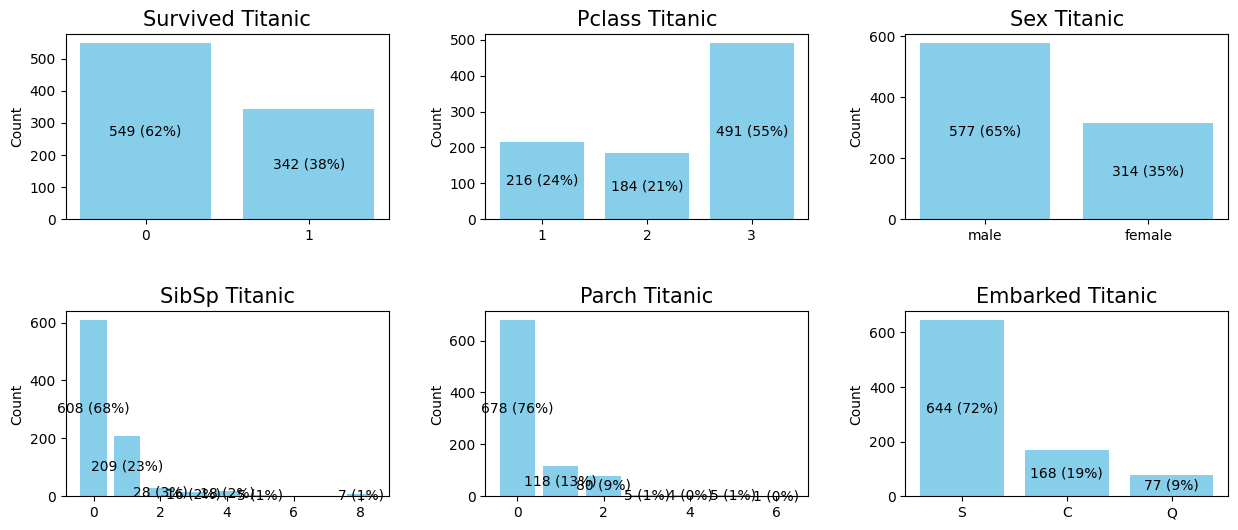

In [25]:
fig, myplot = plt.subplots(figsize=(15, 6), nrows=2, ncols=3)

categorical_features = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

row, col, num_cols = 0, 0, 3

for u in categorical_features:
    values_counts = train_data[u].value_counts()
    ax = myplot[row, col]
    
    # For "Survived" plot, set x-ticks to only 0 and 1 - for better performance
    if u == "Survived":
        ax.bar(values_counts.index, values_counts, color='skyblue')
        ax.set_xticks([0, 1])
    elif u == "Pclass":
        ax.bar(values_counts.index, values_counts, color='skyblue')
        ax.set_xticks([1, 2, 3])
    else:
        ax.bar(values_counts.index, values_counts, color='skyblue')

    ax.set_xlabel("")
    ax.set_title(u + " Titanic", fontsize=15)
    ax.set_ylabel("Count")
    col = col + 1
    if col == 3:
        col = 0
        row = row + 1

plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.3)

for v in range(2):
    for z in range(3):
        ax = myplot[v, z]
        for patch in ax.patches:
            label_x = patch.get_x() + patch.get_width() / 2
            label_y = patch.get_y() + patch.get_height() / 2
            ax.text(label_x, label_y,
                    f"{int(patch.get_height())} ({patch.get_height() / len(train_data[u]):.0%})",
                    horizontalalignment='center', verticalalignment='center')

plt.show()

#### Analyze the numeric data - Age

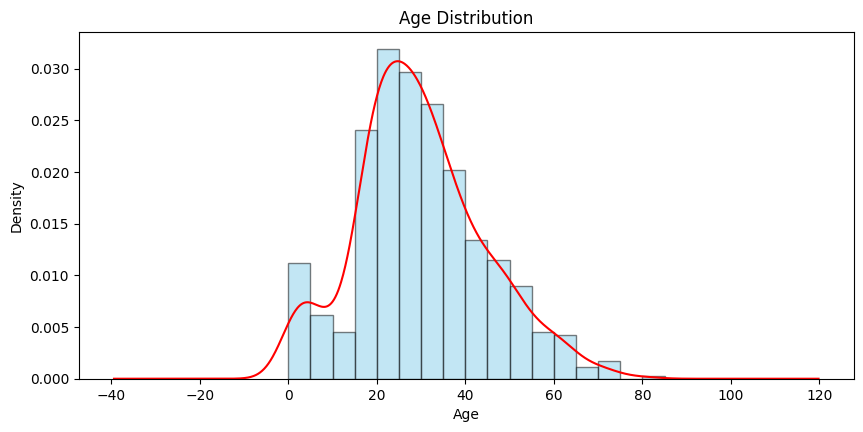

In [34]:
# Null and known ages
null_ages = pd.isnull(train_data['Age'])
known_ages = pd.notnull(train_data['Age'])
preimputation = train_data['Age'][known_ages]

# Explore Age distribution as a whole with kernel density estimate
plt.figure(figsize=(10, 4.5))
plt.hist(train_data['Age'].dropna(), bins=range(0, 100, 5), color='skyblue', edgecolor='black', density=True, alpha=0.5)
train_data['Age'].plot(kind='kde', color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

## Feature selection - Analyze relationship of feature and goal

#### Gender and survied

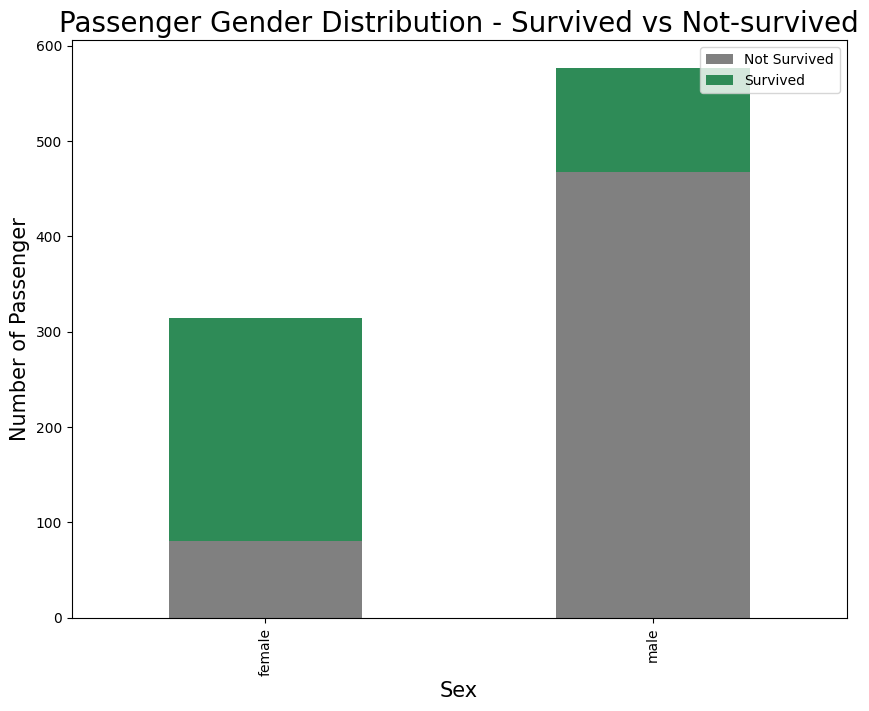

In [35]:
# Count plot for Passenger Gender Distribution
fig, myaxis = plt.subplots(figsize=(10, 7.5))

# Counting and plotting for Survived and Not Survived
survived_counts = train_data.groupby(['Sex', 'Survived']).size().unstack()
survived_counts.plot(kind='bar', stacked=True, color=['gray', 'seagreen'], ax=myaxis, linewidth=2)

# Fixing title, xlabel, and ylabel
myaxis.set_title("Passenger Gender Distribution - Survived vs Not-survived", fontsize=20)
myaxis.set_xlabel("Sex", fontsize=15)
myaxis.set_ylabel("Number of Passenger", fontsize=15)

# Adding legend
myaxis.legend(["Not Survived", "Survived"], loc='upper right')

plt.show()

#### PClasss and survived

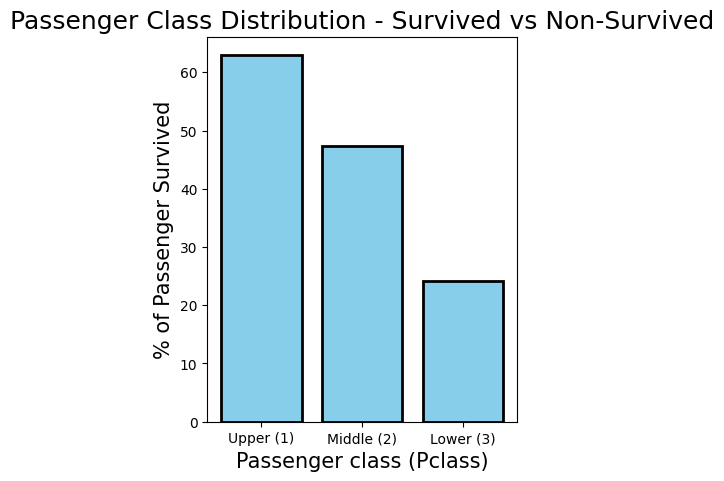

In [37]:
# Bar plot for Passenger Class Distribution
fig, pclass_bar = plt.subplots(figsize=(4, 5))

# Calculate the mean of Survived for each Pclass
survival_percentage = train_data.groupby('Pclass')['Survived'].mean()

# Bar plot
pclass_bar.bar(survival_percentage.index, survival_percentage * 100, color='skyblue', edgecolor='black', linewidth=2)

# Fixing title, xlabel, and ylabel
pclass_bar.set_title("Passenger Class Distribution - Survived vs Non-Survived", fontsize=18)
pclass_bar.set_xlabel("Passenger class (Pclass)", fontsize=15)
pclass_bar.set_ylabel("% of Passenger Survived", fontsize=15)

# Adding custom x-axis labels
labels = ['Upper (1)', 'Middle (2)', 'Lower (3)']
pclass_bar.set_xticks(survival_percentage.index)
pclass_bar.set_xticklabels(labels)

plt.show()

### Embarked against Survived

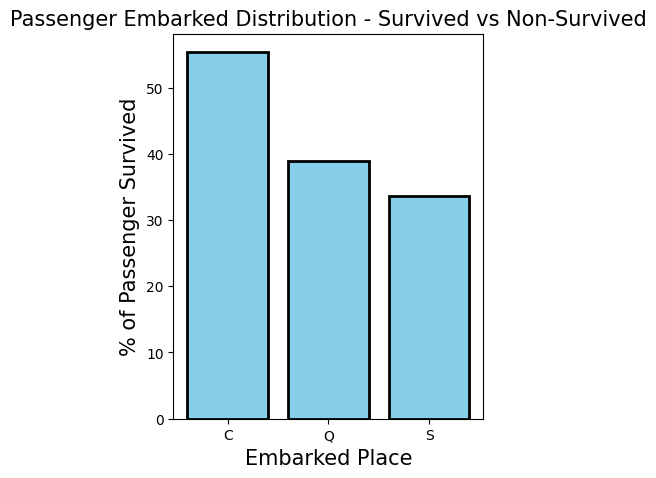

In [41]:
# Bar plot for Passenger Embarked Distribution
fig, embarked_bar = plt.subplots(figsize=(4, 5))

# Calculate the mean of Survived for each Embarked place
survival_percentage = train_data.groupby('Embarked')['Survived'].mean()

# Bar plot
embarked_bar.bar(survival_percentage.index, survival_percentage * 100, color='skyblue', edgecolor='black', linewidth=2)

# Fixing title, xlabel, and ylabel
embarked_bar.set_title("Passenger Embarked Distribution - Survived vs Non-Survived", fontsize=15)
embarked_bar.set_xlabel("Embarked Place", fontsize=15)
embarked_bar.set_ylabel("% of Passenger Survived", fontsize=15)

plt.show()

### Relationship between features and goal

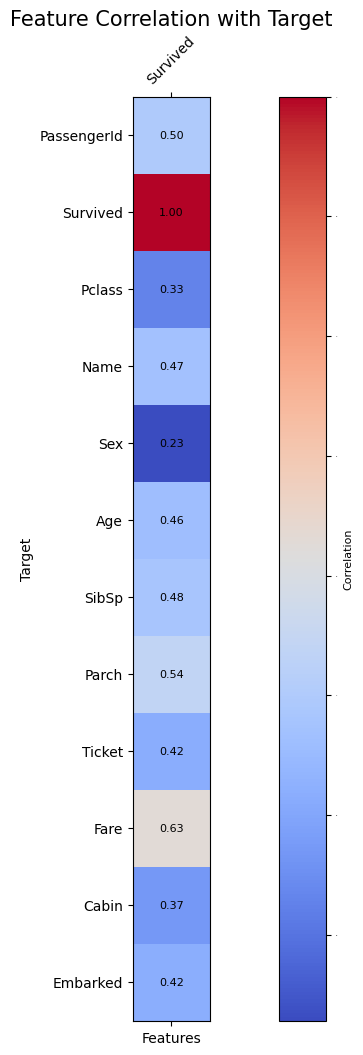

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def feature_correlation_heatmap(dataframe, target_column):
    # Encode non-numeric categorical features
    label_encoders = {}
    for column in dataframe.select_dtypes(include=['object']).columns:
        label_encoder = LabelEncoder()
        dataframe[column] = label_encoder.fit_transform(dataframe[column])
        label_encoders[column] = label_encoder

    # Calculate correlation between features and target
    correlation_matrix = dataframe.corr()[[target_column]]

    # Normalize the correlation values to the range [0, 1]
    correlation_matrix[target_column] = (correlation_matrix[target_column] + 1) / 2

    # Plot heatmap
    fig, ax = plt.subplots(figsize=(18, 12))
    cax = ax.matshow(correlation_matrix, cmap='coolwarm')

    # Customize the plot
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, fontsize=10)
    plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index, fontsize=10)
    plt.xlabel('Features', fontsize=10)
    plt.ylabel('Target', fontsize=10)
    plt.title('Feature Correlation with Target', fontsize=15)

    # Add colorbar
    cbar = fig.colorbar(cax)
    cbar.set_label('Correlation', fontsize=8)

    # Display original labels for categorical features
    for i, column in enumerate(dataframe.select_dtypes(include=['object']).columns):
        ax.set_xticklabels([col if col not in label_encoders else label_encoders[col].inverse_transform([col])[0] for col in correlation_matrix.columns], fontsize=10)

     # Increase the size of x-axis tick labels
    ax.tick_params(axis='x', which='both', labelsize=10)

    # Annotate each cell with the correlation value
    for i in range(len(correlation_matrix.index)):
        for j in range(len(correlation_matrix.columns)):
            text = f"{correlation_matrix.iloc[i, j]:.2f}"
            ax.text(j, i, text, ha='center', va='center', fontsize=10 - 2, color='black')

    plt.show()

feature_correlation_heatmap(train_data, 'Survived')


# Data pre-processing

### Feature seleection

In [74]:
from sklearn.model_selection import train_test_split
x_train = train_data.drop('Survived', axis=1)  # Assuming 'Survived' is the target column
y_train = train_data['Survived']

# With human knowledge, we can easily recognize that the Id and Name of the Passenger, 
# although they have a relatively high correlation on the heatmap, are certainly not 
# decisive factors for the survival of the Passenger. Therefore, we will exclude these two features from the training data.
x_train = x_train.drop('PassengerId', axis=1)
x_train = x_train.drop('Name', axis= 1)

# Check the reminder features
print(x_train.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')


### Missing value

In [75]:
from sklearn.impute import SimpleImputer

#Handle missing value with median
def handle_missing_values(x_train):
    imputer = SimpleImputer(strategy='median')

    x_train_imputed = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)

    return x_train_imputed


x_train = handle_missing_values(x_train)

In [76]:
#Check missing value
def display_missing(data):    
    for col in data.columns.tolist():          
        print('{} column missing values: {}'.format(col, data[col].isnull().sum()))
    print('\n')
    
display_missing(x_train)

Pclass column missing values: 0
Sex column missing values: 0
Age column missing values: 0
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 0
Embarked column missing values: 0




### Normalization

In [78]:
from sklearn.preprocessing import MinMaxScaler

#Normalize with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
X_scaled = scaler.transform(x_train)

print(X_scaled)

[[1.         1.         0.27117366 ... 0.01415106 1.         0.66666667]
 [0.         0.         0.4722292  ... 0.13913574 0.55102041 0.        ]
 [1.         0.         0.32143755 ... 0.01546857 1.         0.66666667]
 ...
 [1.         0.         0.34656949 ... 0.04577135 1.         0.66666667]
 [0.         1.         0.32143755 ... 0.0585561  0.40816327 0.        ]
 [1.         1.         0.39683338 ... 0.01512699 1.         0.33333333]]
